<a href="https://colab.research.google.com/github/Khouloud-Kessentini/Data-Mining-Employee-Analysis-/blob/main/scripts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Data Analysis Project

**Author :** Khouloud Kessentini

###Sommaire du projet: On étudie pour ce projet une base de données d'employées de la société SBA Software.

Structure du projet:

* Prétraitements sur les données
* Normalisation des données
* Visualisation
* Analyse des Composantes Principales (ACP)
* Interprétations
* Classification Hiérarchique
* Algorithme de K-Means



On a lié notre projet au drive pour assurer l'enregistrement d'une copie de notre code source sur le drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importation de la bibliothèque pandas sous l'alias "pd"

In [ ]:
import pandas as pd

In [ ]:
DATA = pd.read_csv('/content/drive/MyDrive/HR_SBA_Software.csv')

In [ ]:
DATA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#Pré-traitement de données

Le niveau de satisfaction doit être compris entre 0 et 1.
On va procèder à une vérification que nos données sont toutes dans l'intervalle [0, 1]

In [ ]:
print ("Valeur minimale",min(DATA.satisfaction_level))
print ("Valeur maximale",max(DATA.satisfaction_level))

Valeur minimale 0.09
Valeur maximale 1.0


Les valeurs relatives à la variable "last_evaluation" doit être compris entre 0 et 1. On va procèder à une vérification que nos données sont toutes dans l'intervalle [0, 1]

In [ ]:
print ("Valeur minimale",min(DATA.last_evaluation))
print ("Valeur maximale",max(DATA.last_evaluation))

Valeur minimale 0.36
Valeur maximale 1.0


On doit verifier qu'il n'y'a pas de valeurs négatives pour la variable "number_project"


In [ ]:
if (min(DATA.number_project>=0)):
  print ("Pas de valeurs négative! La première condition est vérifiée")
else:
  print ("Il y'a des valeurs négatives! On doit corriger quelques observations")

Pas de valeurs négative! La première condition est vérifiée


On doit vérifier qu'il n'y'a pas de valeurs exagerés pour le nombre de projets

In [ ]:
print ("Nombre maximal de projets: ", max(DATA.number_project))

Nombre maximal de projets:  7


On doit vérifier qu'il n'y'a pas de valeurs négatives pour le nombre de projets

In [ ]:
print ("Nombre maximal de projets: ", min(DATA.number_project))

Nombre maximal de projets:  2


Le nombre minimal ne doit pas être négatif. Il doit être aussi une valeur raisonnable (exemple: 2heures\mois n'est pas raisonnable)

In [ ]:
print (min(DATA.average_montly_hours))

96


Le nombre maximal raisonnable par mois est 275 (soit 10heures maximum par jour et 6jours/semaine)

In [ ]:
print (max(DATA.average_montly_hours))

310


On élimiera les observation > 250 heures. Une observation ayant nombre d'heures > 250 est considérée comme valeur très exagérée.

In [ ]:
indexNames = DATA[ DATA['average_montly_hours']>250].index
DATA.drop(indexNames, inplace=True)
DATA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.40,0.48,2,155,3,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low


Les valeurs min et max sont 2 et 10 ans (valeurs raisonnables)

In [ ]:
print ("temps minimal à l'entreprise", min(DATA.time_spend_company))
print ("temps maximal à l'entreprise", max(DATA.time_spend_company ))

temps minimal à l'entreprise 2
temps maximal à l'entreprise 10


Cette valeur est binaire, soit 0 soit 1. On va vérifier qu'il n'y'a pas d'autres valeurs (exemple: 2, 0.5, -1 ..). On calcule l'occurence de 0 et l'occurence de 1 et on compare leurs sommes par rapport au nombre total d'observations.

In [ ]:
occurence_0 = DATA.Work_accident[DATA['Work_accident']==0].count()
occurence_1 = DATA.Work_accident[DATA['Work_accident']==1].count()
len(DATA) == occurence_0 + occurence_1

True

Cette valeur est binaire, soit 0 soit 1. On va vérifier qu'il n'y'a pas de valeurs autres que 0 et 1. Pour le faire, on calcule l'occurence de 0 et l'occurence de 1 et on compare leurs sommes par rapport au nombre total d'observations.


In [ ]:
occurence_0 = DATA.left[DATA['left']==0].count()
occurence_1 = DATA.left[DATA['left']==1].count()
len(DATA) == occurence_0 + occurence_1

True

Le nombre de promotions ne doit pas être négatif. Il doit être aussi une valeur raisonnable (exemple: 10 promotions dans 5 ans n'est pas raisonnable).

In [ ]:
print ("Nombre minimal de promotions", min(DATA.promotion_last_5years))
print ("Nombre maximal de promotions", max(DATA.promotion_last_5years))

Nombre minimal de promotions 0
Nombre maximal de promotions 1


Il parait qu'il y'a une faute dans le nom de la colonne. Il doit être "Departement" au lieu de "sales". On change le nom de la colonne "sales" par "Departement".


In [ ]:
DATA.columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
              'Work_accident','left','promotion_last_5years','Departement', 'salary']

On va visualiser les départements existants et vérifier s'il y'a des erreurs de saisie.

In [ ]:
DATA['Departement'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
#Elimination des duplications
DATA.drop_duplicates(keep='first', inplace=True)

In [ ]:
#On a besoin de donées numériques pour appliquer l'ACP
#On remplace les données qualitatives par des données quantitatives
#sales = 1  -- accounting = 2 -- hr = 3 -- technical = 4 -- support = 5
#management = 6 -- IT = 7 -- product_mng = 8 -- marketing = 9 -- RandD = 10

#Ils existent deux méthode d'éffectuer cette tâche:
# 1-remplacement d'une seule valeur, exemples:
DATA['Departement'] = DATA['Departement'].replace(['sales'], 0.1)
DATA['Departement'] = DATA['Departement'].replace(['accounting'], 0.2)
DATA['Departement'] = DATA['Departement'].replace(['hr'], 0.3)
DATA['Departement'] = DATA['Departement'].replace(['technical'], 0.4)

# 2-remplacement de plusieurs valeurs en parallèle
DATA['Departement'] = DATA['Departement'].replace(['support','management','IT'], [0.5,0.6,0.7])
DATA['Departement'] = DATA['Departement'].replace(['product_mng','marketing','RandD'], [0.8,0.9,1])

#verifions maintenant que tous les départements ont été modifiés
DATA['Departement'].unique()

<ipython-input-22-91ce8471dfff>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DATA['Departement'] = DATA['Departement'].replace(['product_mng','marketing','RandD'], [0.8,0.9,1])


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
#On va transformer ces données en qualitatives en des données quantitatives comme suit:
#low = 1 -- medium = 2 -- high = 3
DATA['salary'] = DATA['salary'].replace(['low','medium','high'],[0.1,0.2,0.3])

#On vérifie les transformations effecutées:
DATA['salary'].unique()

<ipython-input-23-96d781f31cbb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DATA['salary'] = DATA['salary'].replace(['low','medium','high'],[0.1,0.2,0.3])


array([0.1, 0.2, 0.3])

In [ ]:
DATA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departement,salary
0,0.38,0.53,2,157,3,0,1,0,0.1,0.1
3,0.72,0.87,5,223,5,0,1,0,0.1,0.1
4,0.37,0.52,2,159,3,0,1,0,0.1,0.1
5,0.41,0.50,2,153,3,0,1,0,0.1,0.1
6,0.10,0.77,6,247,4,0,1,0,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...
11992,0.62,0.85,3,237,3,1,0,0,0.7,0.2
11994,0.22,0.94,3,193,10,0,0,1,0.6,0.3
11997,0.85,0.54,3,185,10,0,0,1,0.6,0.3
11998,0.33,0.65,3,172,10,0,0,1,0.9,0.3


#Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #création d'une instance de la classe StandardScaler() appelée scaler
Z=scaler.fit_transform(DATA) #rendre les données centrées réduites
Z # Z à ce niveau est un array
Z = pd.DataFrame(Z) # on on change la structure de données de Z de array vers DataFrame

 #Visualisation des Données

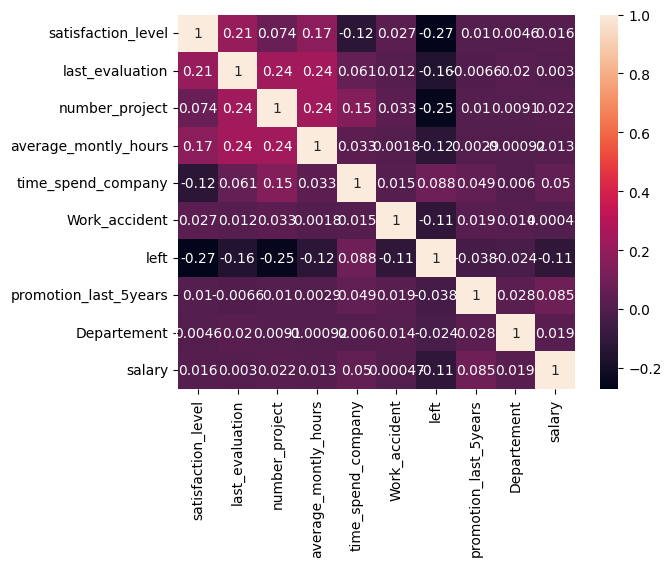

In [ ]:
#on remarque ici que la corrélation entre nos données n'est pas très forte
#pas de corrélation forte ni positive (tend vers 1) ni négative (tends vers -1)
import matplotlib.pyplot as plt
import seaborn
plt.subplots_adjust(hspace=10, wspace=0.1,bottom=0.1)
matrice=DATA.corr()
seaborn.heatmap(matrice,annot=True)
plt.show()

#Analyse des Composantes Principales

In [ ]:
from sklearn.decomposition import PCA
ACP = PCA()   #cette commande crée une instance de la classe PCA() appelée ACP(nom de l'instance)
Z = ACP.fit_transform(Z) #cette commande applique l'ACP sur notre base Z

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ACP.explained_variance_ # Cette commande calcule la variance de chaque variable
                          # C'est à dire, la participation de chaque variable dans la quantité d'informations générale

array([1.8095458 , 1.20677288, 1.13144599, 1.00972098, 0.99170225,
       0.92381209, 0.82865714, 0.78523194, 0.72273474, 0.59142003])

In [ ]:
ACP.explained_variance_ratio_   # Cette commande nous donne la variance par rapport à 1

array([0.18093569, 0.12066469, 0.11313279, 0.10096156, 0.09915987,
       0.09237157, 0.08285706, 0.078515  , 0.07226593, 0.05913583])

In [ ]:
#On calcule ici la participation de chaque variable en pourcentage %
def explained_variance_en_pourcentage(ACP):
  for i in range (10):
    print(ACP.explained_variance_ratio_[i]*100)
explained_variance_en_pourcentage(ACP)

18.093569351285062
12.066469259584714
11.313278989509055
10.096155911133692
9.915987475530228
9.237156659497286
8.285706475284117
7.851499804089042
7.22659307864858
5.913582995438205


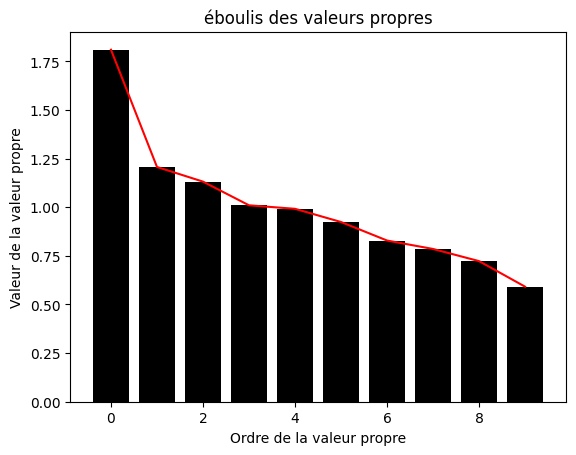

In [ ]:
# ================================================== VISUALISATION DES VALEURS PROPRES ====================================================================#
import numpy as np
val_propore = ACP.explained_variance_
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10),val_propore,color="#FF0000") # 10 représente le nombre de composantes principales
# On peut trouver le nombre de composantes principales à travers la commande:
#ACP.n_components_
plt.bar(np.arange(0,10),val_propore, width=0.8, color="#000000")

#annotation de la figure
plt.title("éboulis des valeurs propres")
plt.ylabel("Valeur de la valeur propre")
plt.xlabel("Ordre de la valeur propre")
plt.show()

###VISUALISATION DE LA COURBE DE CUMUL DE VARIANCE

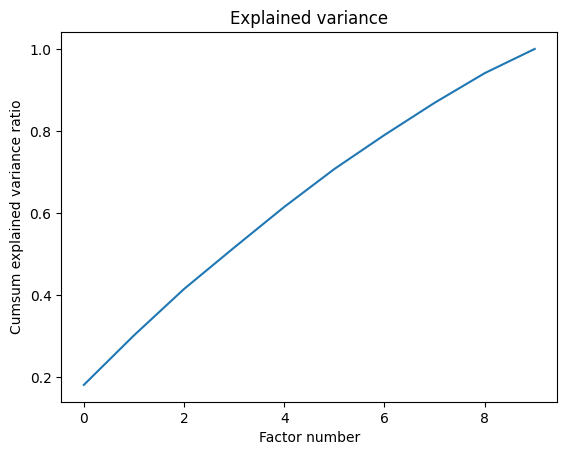

In [ ]:
plt.plot(np.arange(0,10),np.cumsum(ACP.explained_variance_ratio_))
plt.title("Explained variance")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Ici tellement les variances des variables est proche, la courbe du cumul de variance expliquée est presque lineaire.

On va choisir les composantes principales à travers le critère de Kaiser. On va choisir les variables dont la variance est supérieure à 1. Ici on a 4 variables dont leur lambda(variance) est > 1.

In [ ]:
ACP.explained_variance_
#NOTONS ICI QUE LE CRITERE DE COUDE NE PEUT PAS ETRE TRES EFFICACE PUISQUE LA COURBE DE VARIANCES CUMULATIVES EST PRESQUE LINEAIRE.

array([1.8095458 , 1.20677288, 1.13144599, 1.00972098, 0.99170225,
       0.92381209, 0.82865714, 0.78523194, 0.72273474, 0.59142003])

#Intérpréatations

C'est vrai que les données ne sont pas bien corrélées mais on peut quand même avoir des déduction

  1. On remarque que promotion_last_5_years n'a pas une grande corrélation avec les autres variables (la plus grande corrélation pour la variable promotion_last_5_years est avec la varibale salary est 0.08), ce qu'il paraît, les promotions sont données d'une façon anarchique et n'ont pas une formule bien déterminée.

  2. On remarque que la covariance des variables number_projects et la variable left est -0.25 ce qui implique que plus le nombre de projets augmente plus la probabilité de quitter l'entreprise se minimise et vice versa, plus la probabilité de quitter une entreprise est grande plus le nombre de projets se trouve minimal. Notons ici que la corrélation est juste -0.25, elle n'est pas très proche de -1 donc on ne parle pas d'une grande corrélation entre ces deux variables.

  3. La covariance entre  Departement et promotion_last_5_years est 0.028 c'est à dire que le département n'est pas un critère imprtant pour avoir une promotion. On remarque aussi que la corrélation entre la variable Département et toutes les autres variables est très faible ce qui implique que la variable Département n'influe pas beaucoup la quantité d'information totale.

  4. La covariance entre number_project et satisfaction_level est 0.24 , c'est vrai que c'est une corrélation faible mais elle peut nous donner que plus le nombre de projets est elevé plus le niveau de satisfaction est elevé (corrélation positive).

  5. La covariance entre satisfaction_level et left est -0.24, c'est une corrélation négative, elle nous donnera que plus le niveau de satisfaction augmente, plus la probabilité de quitter l'entreprise se minimise (corrélation négative)

  6. La corrélation entre salary et work_accident est 0.0004, cela nous donne qu'il n'y'a pas de corrélation entre ces deux variables. Il n'y'a pas de relation entre le salaire et les accidents de travail.

In [ ]:
#On choisit donc les 4 variables qui nous donnenet plus de quantité d'informations (d'après le critère de Kaiser)
ACP = PCA(n_components = 4)
Z = ACP.fit_transform(Z)
Z = pd.DataFrame(Z)
Z

,0,1,2,3
0,3.300770,0.140716,-1.215541,-0.232112
1,-0.276774,1.940888,-2.347082,-0.329041
2,3.324020,0.160382,-1.215073,-0.228917
3,3.372274,0.050024,-1.146774,-0.224627
4,0.465308,2.928829,-2.481116,0.035982
...,...,...,...,...
9576,-1.176437,-0.218150,0.827681,1.583529
9577,-0.617380,6.105640,5.223483,-2.228627
9578,-0.582226,4.579094,5.860893,-2.435248
9579,0.164613,5.679001,6.028055,-1.998690


#Clustering Hiérarchique (Agglomeratif)

#####ON VA APPLIQUER LA CLASSIFICATION HIERARCHIQUE POUR IDENTIFIER LE NOMBRE DE CLUSTERS.

#####LE NOMBRE DE CLUSTERS QU'ON VA EXTRAIRE A PARTIR DE LA CLASSIFICATION HIERARCHIQUE VA NOUS AIDER A IDENTIFIER LA VALEUR OPTIMALE "K" POUR L'APPLICATION DE L'ALGORITHME DE K-MEANS.

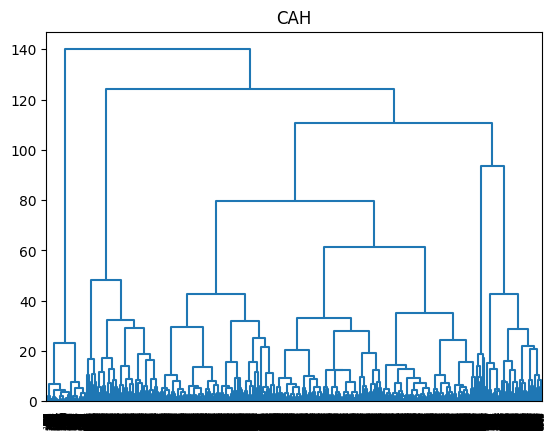

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
CAH = linkage(Z,method='ward', metric='euclidean')
plt.title("CAH")
dendrogram(CAH,orientation='top',color_threshold=0)
plt.show()

D'après le dendrogramme, on voit que 4 être le meilleur nombre de clusters. On a identifié cette valeur en se basant sur les distances observées dans le dendrogramme.

#Clustering K-Means

On applique l'algorithme de kmeans sur la base Z avec k=5.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(Z) #On a crée une instance de la classe KMeans() avec un nombre de cluster(de groupes) égal à 5 pour la base Z
print(kmeans)

KMeans(n_clusters=4)


Afficher les coordonnées de chaque centroïde et l'inertie associée.

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.69698782  0.03644185 -0.0806501  -0.1512389 ]
 [-0.4371692  -0.45376952 -0.07246561 -0.45785612]
 [-0.33658221  1.97517538 -0.4372592  -0.0528993 ]
 [-0.53129588 -0.31230145  0.81151249  1.98120101]]


On a ici les cordonnées des centroides sur 4 axes, si on n'a pas choisit juste 4 composantes principales à travers l'ACP, on devra travailler sur 10 axes qui est une tâche couteuse en nombre d'opérations (Complexité temporelle)

In [ ]:
print(kmeans.labels_) #on afficge ici le groupe(cluster de chaque variable) et quisqu'on a k=4 (4 clusters) donc les groupes seront soit 0 ,1, 2 ou 3

[0 2 0 ... 2 2 1]
